<a href="https://colab.research.google.com/github/danielmsd1/ML/blob/main/nlp_sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
Kea Chebet,
Daniel Simiyu and
Robert Korir

We used the sarcasm detection dataset here: https://drive.google.com/drive/folders/1xbwqaeFX3L6SMpL2kt01RXVzP-cwavCx?usp=sharing

#Using NLP to identify Sarcastic headlines

This is a binary classification, since a headline can either be sarcastic or not.

In [74]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Importing the dataset.

In [75]:
dataset = pd.read_json('/content/drive/MyDrive/datasets/nlp_sarcasm/Sarcasm_Headlines_Dataset_v2.json',lines=True)
dataset.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


Get the headlines as a list of sentences

In [76]:
sentences = dataset['headline']
sentences = sentences.tolist()
# sentences

In [77]:
labels = dataset['is_sarcastic']
labels = labels.tolist()

In [78]:
urls = dataset['article_link']
urls = urls.tolist()
# urls

#Splitting Train and Test sets

Using 80% of the data to train the model

In [79]:
X_train, X_test,y_train,y_test = train_test_split(sentences,labels,train_size = 0.8,random_state =42,shuffle=True)

In [80]:
dataset.shape

(28619, 3)

In [81]:
print(len(X_train),len(X_test),len(y_test),len(y_test))

22895 5724 5724 5724


In [82]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
training_size = 20000

Convert the individual words into numbers and replacing any of the unknown words with the out of vocabulary (oov) token.

In [83]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token="oov")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# word_index

In [ ]:
training_sequences = tokenizer.texts_to_sequences(X_train)
# training_sequences

In [85]:
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding='post',truncating='post')

In [86]:
testing_sequences = tokenizer.texts_to_sequences(X_test)

In [87]:
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding='post',truncating='post')

In [88]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [89]:
print(training_padded.shape,training_labels.shape,testing_padded.shape,testing_labels.shape)
testing_labels

(22895, 100) (22895,) (5724, 100) (5724,)


array([0, 1, 1, ..., 0, 0, 1])

#Creating and training a model

In [90]:
model = tf.keras.Sequential([Embedding(vocab_size,embedding_dim,input_length=max_length),
                             GlobalAveragePooling1D(),
                             Dense(24,activation='relu'),
                             Dense(1,activation='sigmoid')
                             ])

In [91]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
None


We are tracking the accuracy in order to know the number of correct predictions out of the total number of predictions made.

In [92]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
# mc = ModelCheckpoint('best_model.h5',monitor='accuracy',mode='max',save_best_only=True,verbose=1)
history = model.fit(training_padded,training_labels,epochs=30,validation_data=(testing_padded,testing_labels),verbose=2)

Epoch 1/30
716/716 - 3s - loss: 0.6305 - accuracy: 0.6752 - val_loss: 0.4783 - val_accuracy: 0.8047
Epoch 2/30
716/716 - 2s - loss: 0.3816 - accuracy: 0.8457 - val_loss: 0.3977 - val_accuracy: 0.8131
Epoch 3/30
716/716 - 2s - loss: 0.2967 - accuracy: 0.8817 - val_loss: 0.3409 - val_accuracy: 0.8489
Epoch 4/30
716/716 - 2s - loss: 0.2512 - accuracy: 0.9017 - val_loss: 0.3333 - val_accuracy: 0.8526
Epoch 5/30
716/716 - 2s - loss: 0.2195 - accuracy: 0.9149 - val_loss: 0.3807 - val_accuracy: 0.8339
Epoch 6/30
716/716 - 2s - loss: 0.1966 - accuracy: 0.9244 - val_loss: 0.3425 - val_accuracy: 0.8534
Epoch 7/30
716/716 - 2s - loss: 0.1756 - accuracy: 0.9335 - val_loss: 0.3740 - val_accuracy: 0.8442
Epoch 8/30
716/716 - 2s - loss: 0.1598 - accuracy: 0.9411 - val_loss: 0.3632 - val_accuracy: 0.8527
Epoch 9/30
716/716 - 2s - loss: 0.1468 - accuracy: 0.9470 - val_loss: 0.3922 - val_accuracy: 0.8454
Epoch 10/30
716/716 - 2s - loss: 0.1343 - accuracy: 0.9514 - val_loss: 0.4005 - val_accuracy: 0.8506

In [93]:
def plotGraphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()
  

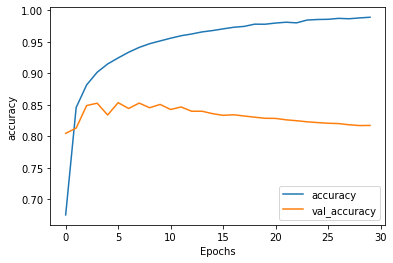

In [94]:
plotGraphs(history,"accuracy")

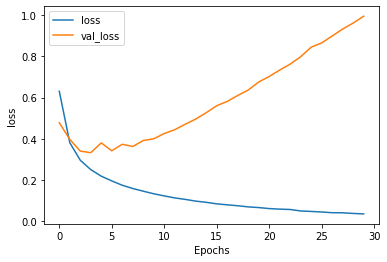

In [95]:
plotGraphs(history,"loss")